In [1]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import chi2
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report


In [2]:

chunk_size = 5000  # Smaller chunk size to prevent memory overflow
chunk_list = []

for chunk in pd.read_csv("GUIDE_Test.csv", chunksize=chunk_size):
    # Perform processing on the chunk if necessary
    chunk_list.append(chunk)

# Concatenate chunks if you need a full dataset
df = pd.concat(chunk_list, ignore_index=True)
df

,Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,MitreTechniques,IncidentGrade,...,Roles,OSFamily,OSVersion,AntispamDirection,SuspicionLevel,LastVerdict,CountryCode,State,City,Usage
0,1245540519230,657,11767,87199,2024-06-04T22:56:27.000Z,524,563,LateralMovement,T1021;T1047;T1105;T1569.002,BenignPositive,...,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630,Private
1,1400159342154,3,91158,632273,2024-06-03T12:58:26.000Z,2,2,CommandAndControl,NaN,BenignPositive,...,NaN,0,0,NaN,Suspicious,Suspicious,242,1445,10630,Public
2,1279900255923,145,32247,131719,2024-06-08T03:20:49.000Z,2932,10807,LateralMovement,T1021;T1027.002;T1027.005;T1105,BenignPositive,...,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630,Public
3,60129547292,222,15294,917686,2024-06-12T12:07:31.000Z,0,0,InitialAccess,T1078;T1078.004,FalsePositive,...,NaN,5,66,NaN,NaN,NaN,242,1445,10630,Public
4,515396080539,363,7615,5944,2024-06-06T17:42:05.000Z,27,18,Discovery,T1087;T1087.002,BenignPositive,...,Suspicious,5,66,NaN,NaN,NaN,242,1445,10630,Public
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4147987,541165881145,262,3017,227156,2024-06-04T03:53:15.000Z,139,120,InitialAccess,T1566.002,BenignPositive,...,NaN,5,66,NaN,NaN,NaN,242,1445,10630,Public
4147988,438086666953,1323,31001,304819,2024-06-04T19:32:19.000Z,219,196,InitialAccess,NaN,BenignPositive,...,NaN,5,66,NaN,NaN,NaN,242,1445,10630,Private
4147989,1297080124487,47,3653,7243,2024-06-15T00:50:22.000Z,57,29,CommandAndControl,T1046;T1071;T1210,FalsePositive,...,NaN,5,66,NaN,NaN,NaN,242,1445,10630,Public
4147990,627065226886,70,4243,19142,2024-06-11T16:18:12.000Z,1,1,InitialAccess,T1566.002,BenignPositive,...,NaN,5,66,NaN,NaN,NaN,242,1445,10630,Private


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4147992 entries, 0 to 4147991
Data columns (total 46 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Id                  int64  
 1   OrgId               int64  
 2   IncidentId          int64  
 3   AlertId             int64  
 4   Timestamp           object 
 5   DetectorId          int64  
 6   AlertTitle          int64  
 7   Category            object 
 8   MitreTechniques     object 
 9   IncidentGrade       object 
 10  ActionGrouped       object 
 11  ActionGranular      object 
 12  EntityType          object 
 13  EvidenceRole        object 
 14  DeviceId            int64  
 15  Sha256              int64  
 16  IpAddress           int64  
 17  Url                 int64  
 18  AccountSid          int64  
 19  AccountUpn          int64  
 20  AccountObjectId     int64  
 21  AccountName         int64  
 22  DeviceName          int64  
 23  NetworkMessageId    int64  
 24  EmailClusterId      floa

In [4]:
df.isna().sum()

Id                          0
OrgId                       0
IncidentId                  0
AlertId                     0
Timestamp                   0
DetectorId                  0
AlertTitle                  0
Category                    0
MitreTechniques       2307104
IncidentGrade               0
ActionGrouped         4146079
ActionGranular        4146079
EntityType                  0
EvidenceRole                0
DeviceId                    0
Sha256                      0
IpAddress                   0
Url                         0
AccountSid                  0
AccountUpn                  0
AccountObjectId             0
AccountName                 0
DeviceName                  0
NetworkMessageId            0
EmailClusterId        4106285
RegistryKey                 0
RegistryValueName           0
RegistryValueData           0
ApplicationId               0
ApplicationName             0
OAuthApplicationId          0
ThreatFamily          4116614
FileName                    0
FolderPath

In [5]:

df["Timestamp"]=pd.to_datetime(df["Timestamp"])
df["Month"]=df["Timestamp"].dt.month
df["Day"]=df["Timestamp"].dt.day
df["Time"]=df["Timestamp"].dt.time
df["Years"]=df["Timestamp"].dt.year


In [6]:
df["IncidentGrade"].fillna(df["IncidentGrade"].mode()[0], inplace=True)


C:\Users\sandh\AppData\Local\Temp\ipykernel_33632\2937521255.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["IncidentGrade"].fillna(df["IncidentGrade"].mode()[0], inplace=True)


In [7]:
# Calculate the percentage of null values for each column
null_percentage = (df.isnull().sum() / len(df)) * 100

# Display the percentage of nulls for each column if greater than 0
for column, percentage in null_percentage.items():
    if percentage > 0:
        print(f"{column}: {percentage:.2f}% null values")


MitreTechniques: 55.62% null values
ActionGrouped: 99.95% null values
ActionGranular: 99.95% null values
EmailClusterId: 98.99% null values
ThreatFamily: 99.24% null values
ResourceType: 99.93% null values
Roles: 97.38% null values
AntispamDirection: 98.16% null values
SuspicionLevel: 84.33% null values
LastVerdict: 76.07% null values


In [8]:
threshold= len(df)* 0.5   # removing 50% above null value


In [9]:
data=df.dropna(thresh=threshold,axis=1)


In [10]:
data.columns

Index(['Id', 'OrgId', 'IncidentId', 'AlertId', 'Timestamp', 'DetectorId',
       'AlertTitle', 'Category', 'IncidentGrade', 'EntityType', 'EvidenceRole',
       'DeviceId', 'Sha256', 'IpAddress', 'Url', 'AccountSid', 'AccountUpn',
       'AccountObjectId', 'AccountName', 'DeviceName', 'NetworkMessageId',
       'RegistryKey', 'RegistryValueName', 'RegistryValueData',
       'ApplicationId', 'ApplicationName', 'OAuthApplicationId', 'FileName',
       'FolderPath', 'ResourceIdName', 'OSFamily', 'OSVersion', 'CountryCode',
       'State', 'City', 'Usage', 'Month', 'Day', 'Time', 'Years'],
      dtype='object')

In [11]:
data.shape

(4147992, 40)

In [12]:
data.isna().sum()

Id                    0
OrgId                 0
IncidentId            0
AlertId               0
Timestamp             0
DetectorId            0
AlertTitle            0
Category              0
IncidentGrade         0
EntityType            0
EvidenceRole          0
DeviceId              0
Sha256                0
IpAddress             0
Url                   0
AccountSid            0
AccountUpn            0
AccountObjectId       0
AccountName           0
DeviceName            0
NetworkMessageId      0
RegistryKey           0
RegistryValueName     0
RegistryValueData     0
ApplicationId         0
ApplicationName       0
OAuthApplicationId    0
FileName              0
FolderPath            0
ResourceIdName        0
OSFamily              0
OSVersion             0
CountryCode           0
State                 0
City                  0
Usage                 0
Month                 0
Day                   0
Time                  0
Years                 0
dtype: int64

In [13]:
data.shape

(4147992, 40)

In [14]:
data.duplicated().sum()

225297

In [15]:
data.drop_duplicates(inplace=True)

C:\Users\sandh\AppData\Local\Temp\ipykernel_33632\2282015914.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop_duplicates(inplace=True)


EXPLORATARY DATA ANALYSIS

In [16]:
data["IncidentGrade"].value_counts()

IncidentGrade
BenignPositive    1630942
TruePositive      1422856
FalsePositive      868897
Name: count, dtype: int64

<Axes: xlabel='IncidentGrade', ylabel='count'>

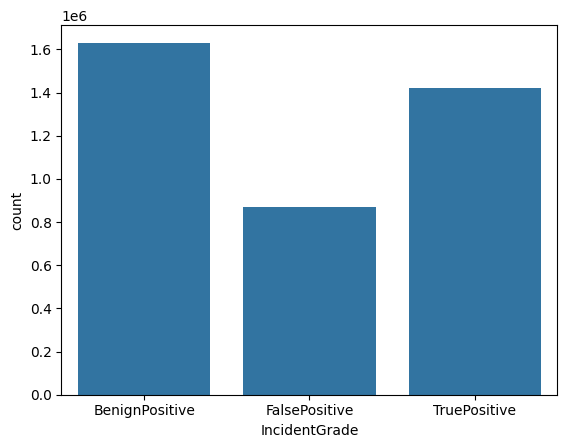

In [17]:
sns.countplot(data, x="IncidentGrade")


In [18]:
data["Category"].value_counts()

Category
InitialAccess          1730207
Exfiltration            615278
SuspiciousActivity      438875
CommandAndControl       357143
Impact                  307809
CredentialAccess        130133
Execution               115651
Malware                  71083
Discovery                63605
Persistence              29063
DefenseEvasion           21556
LateralMovement          18897
UnwantedSoftware          7467
Collection                6267
Ransomware                5581
Exploit                   1644
PrivilegeEscalation       1552
CredentialStealing         873
WebExploit                  11
Name: count, dtype: int64

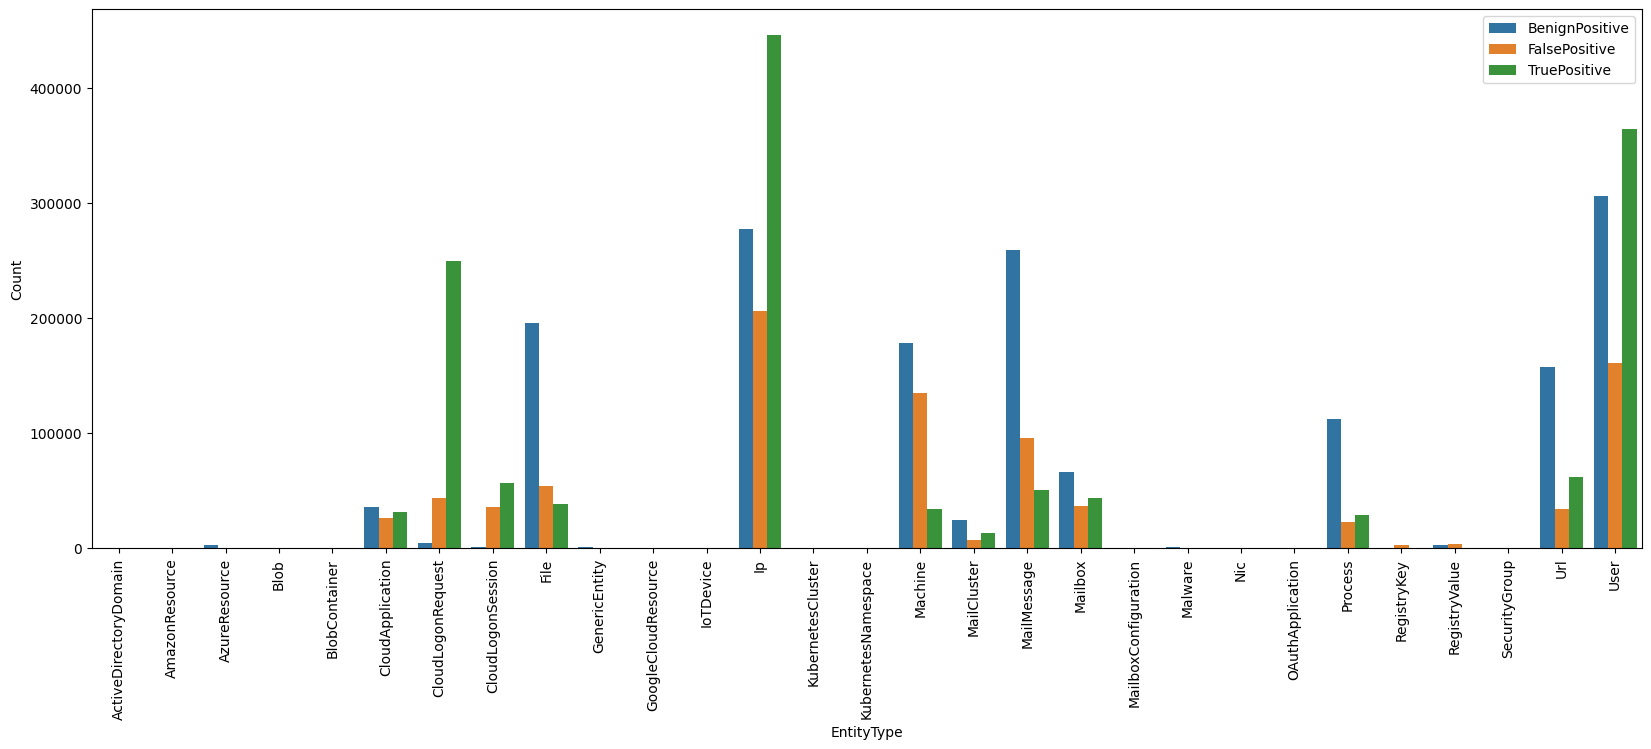

In [19]:

grouped_data=data.groupby(["EntityType","IncidentGrade"]).size().reset_index(name="count")

plt.figure(figsize=(20,7))

sns.barplot(data=grouped_data,x="EntityType", y="count", hue = "IncidentGrade")

plt.xlabel("EntityType")
plt.xticks(rotation=90)

plt.ylabel("Count")
plt.legend()



Text(0, 0.5, 'Count')

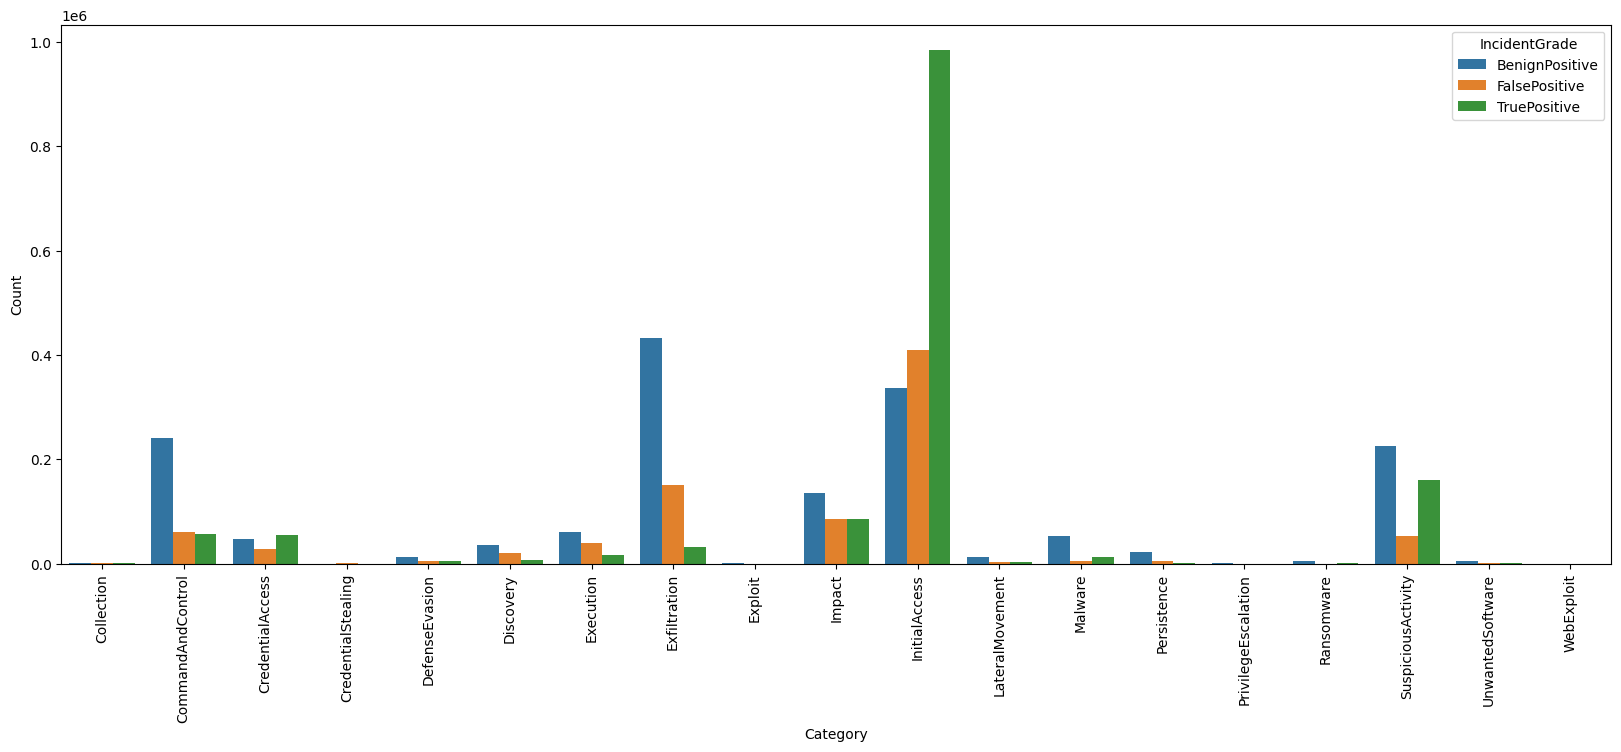

In [20]:
grouped_data=data.groupby(["Category","IncidentGrade"]).size().reset_index(name="Count")
plt.figure(figsize=(20,7))

sns.barplot(data=grouped_data,x="Category",y="Count",hue="IncidentGrade")
plt.xlabel("Category")
plt.xticks(rotation=90)
plt.ylabel("Count")

In [21]:
data_23 = data[data["Years"] == 2023]


In [22]:
grouped_data=data_23.groupby(["Day","IncidentGrade"]).size().reset_index(name="count")


Text(0, 0.5, 'Count')

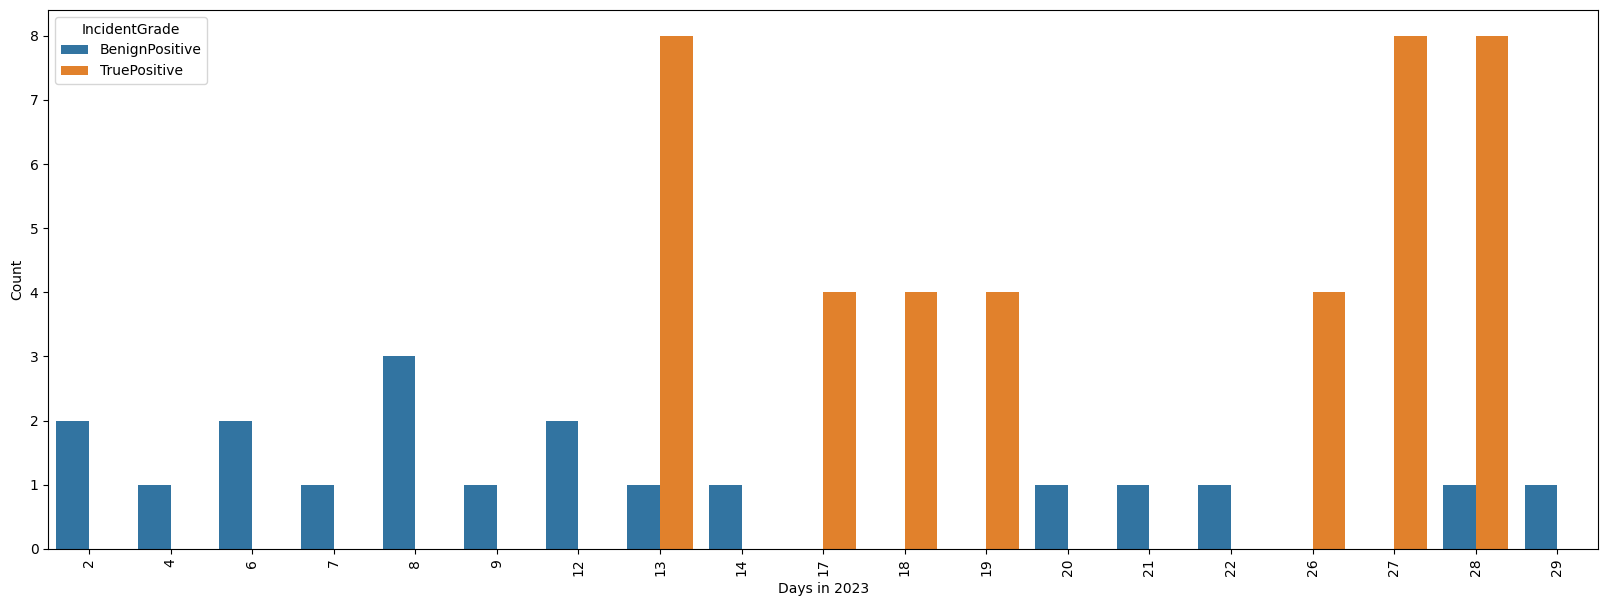

In [23]:
plt.figure(figsize=(20,7))

sns.barplot(data=grouped_data,x="Day",y="count",hue="IncidentGrade")
plt.xlabel("Days in 2023")
plt.xticks(rotation=90)
plt.ylabel("Count")

Text(0, 0.5, 'Count')

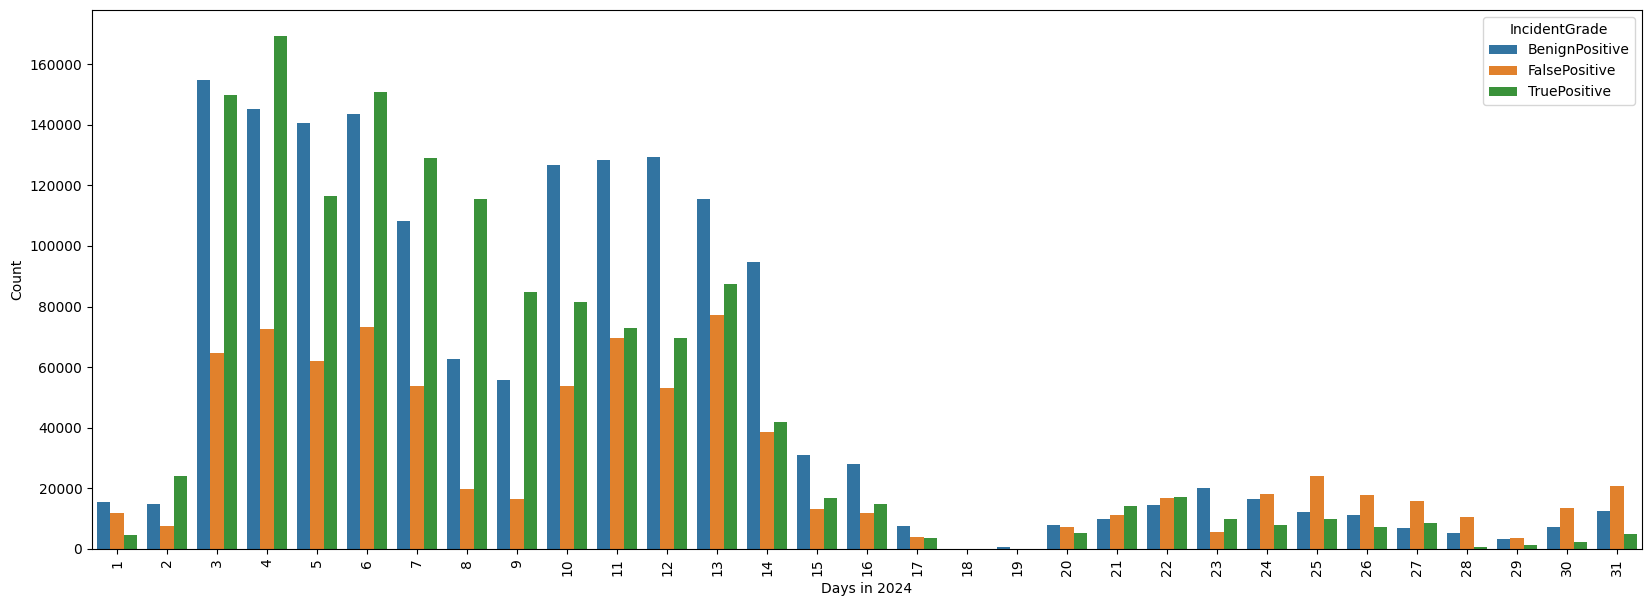

In [24]:
data_24 = data[data["Years"] == 2024]
grouped_data=data_24.groupby(["Day","IncidentGrade"]).size().reset_index(name="count")
plt.figure(figsize=(20,7))

sns.barplot(data=grouped_data,x="Day",y="count",hue="IncidentGrade")
plt.xlabel("Days in 2024")
plt.xticks(rotation=90)
plt.ylabel("Count")


In [25]:
data.head()

,Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,IncidentGrade,EntityType,...,OSFamily,OSVersion,CountryCode,State,City,Usage,Month,Day,Time,Years
0,1245540519230,657,11767,87199,2024-06-04 22:56:27+00:00,524,563,LateralMovement,BenignPositive,User,...,5,66,242,1445,10630,Private,6,4,22:56:27,2024
1,1400159342154,3,91158,632273,2024-06-03 12:58:26+00:00,2,2,CommandAndControl,BenignPositive,Machine,...,0,0,242,1445,10630,Public,6,3,12:58:26,2024
2,1279900255923,145,32247,131719,2024-06-08 03:20:49+00:00,2932,10807,LateralMovement,BenignPositive,Process,...,5,66,242,1445,10630,Public,6,8,03:20:49,2024
3,60129547292,222,15294,917686,2024-06-12 12:07:31+00:00,0,0,InitialAccess,FalsePositive,CloudLogonSession,...,5,66,242,1445,10630,Public,6,12,12:07:31,2024
4,515396080539,363,7615,5944,2024-06-06 17:42:05+00:00,27,18,Discovery,BenignPositive,User,...,5,66,242,1445,10630,Public,6,6,17:42:05,2024


In [26]:
data.drop(columns=["Timestamp"],inplace=True)

C:\Users\sandh\AppData\Local\Temp\ipykernel_33632\2443782200.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns=["Timestamp"],inplace=True)


In [27]:
#droping unimportant column 
data.drop(columns=["Id","Sha256","State","FileName","CountryCode","DeviceId"],inplace=True)

C:\Users\sandh\AppData\Local\Temp\ipykernel_33632\1086174139.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns=["Id","Sha256","State","FileName","CountryCode","DeviceId"],inplace=True)


In [28]:
data.drop(columns=["AccountSid","OAuthApplicationId","OSFamily"],inplace=True)

C:\Users\sandh\AppData\Local\Temp\ipykernel_33632\1554352699.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns=["AccountSid","OAuthApplicationId","OSFamily"],inplace=True)


In [29]:
numeric_data=data.select_dtypes(include=['number'])

corr_matrix=numeric_data.corr()

<Axes: >

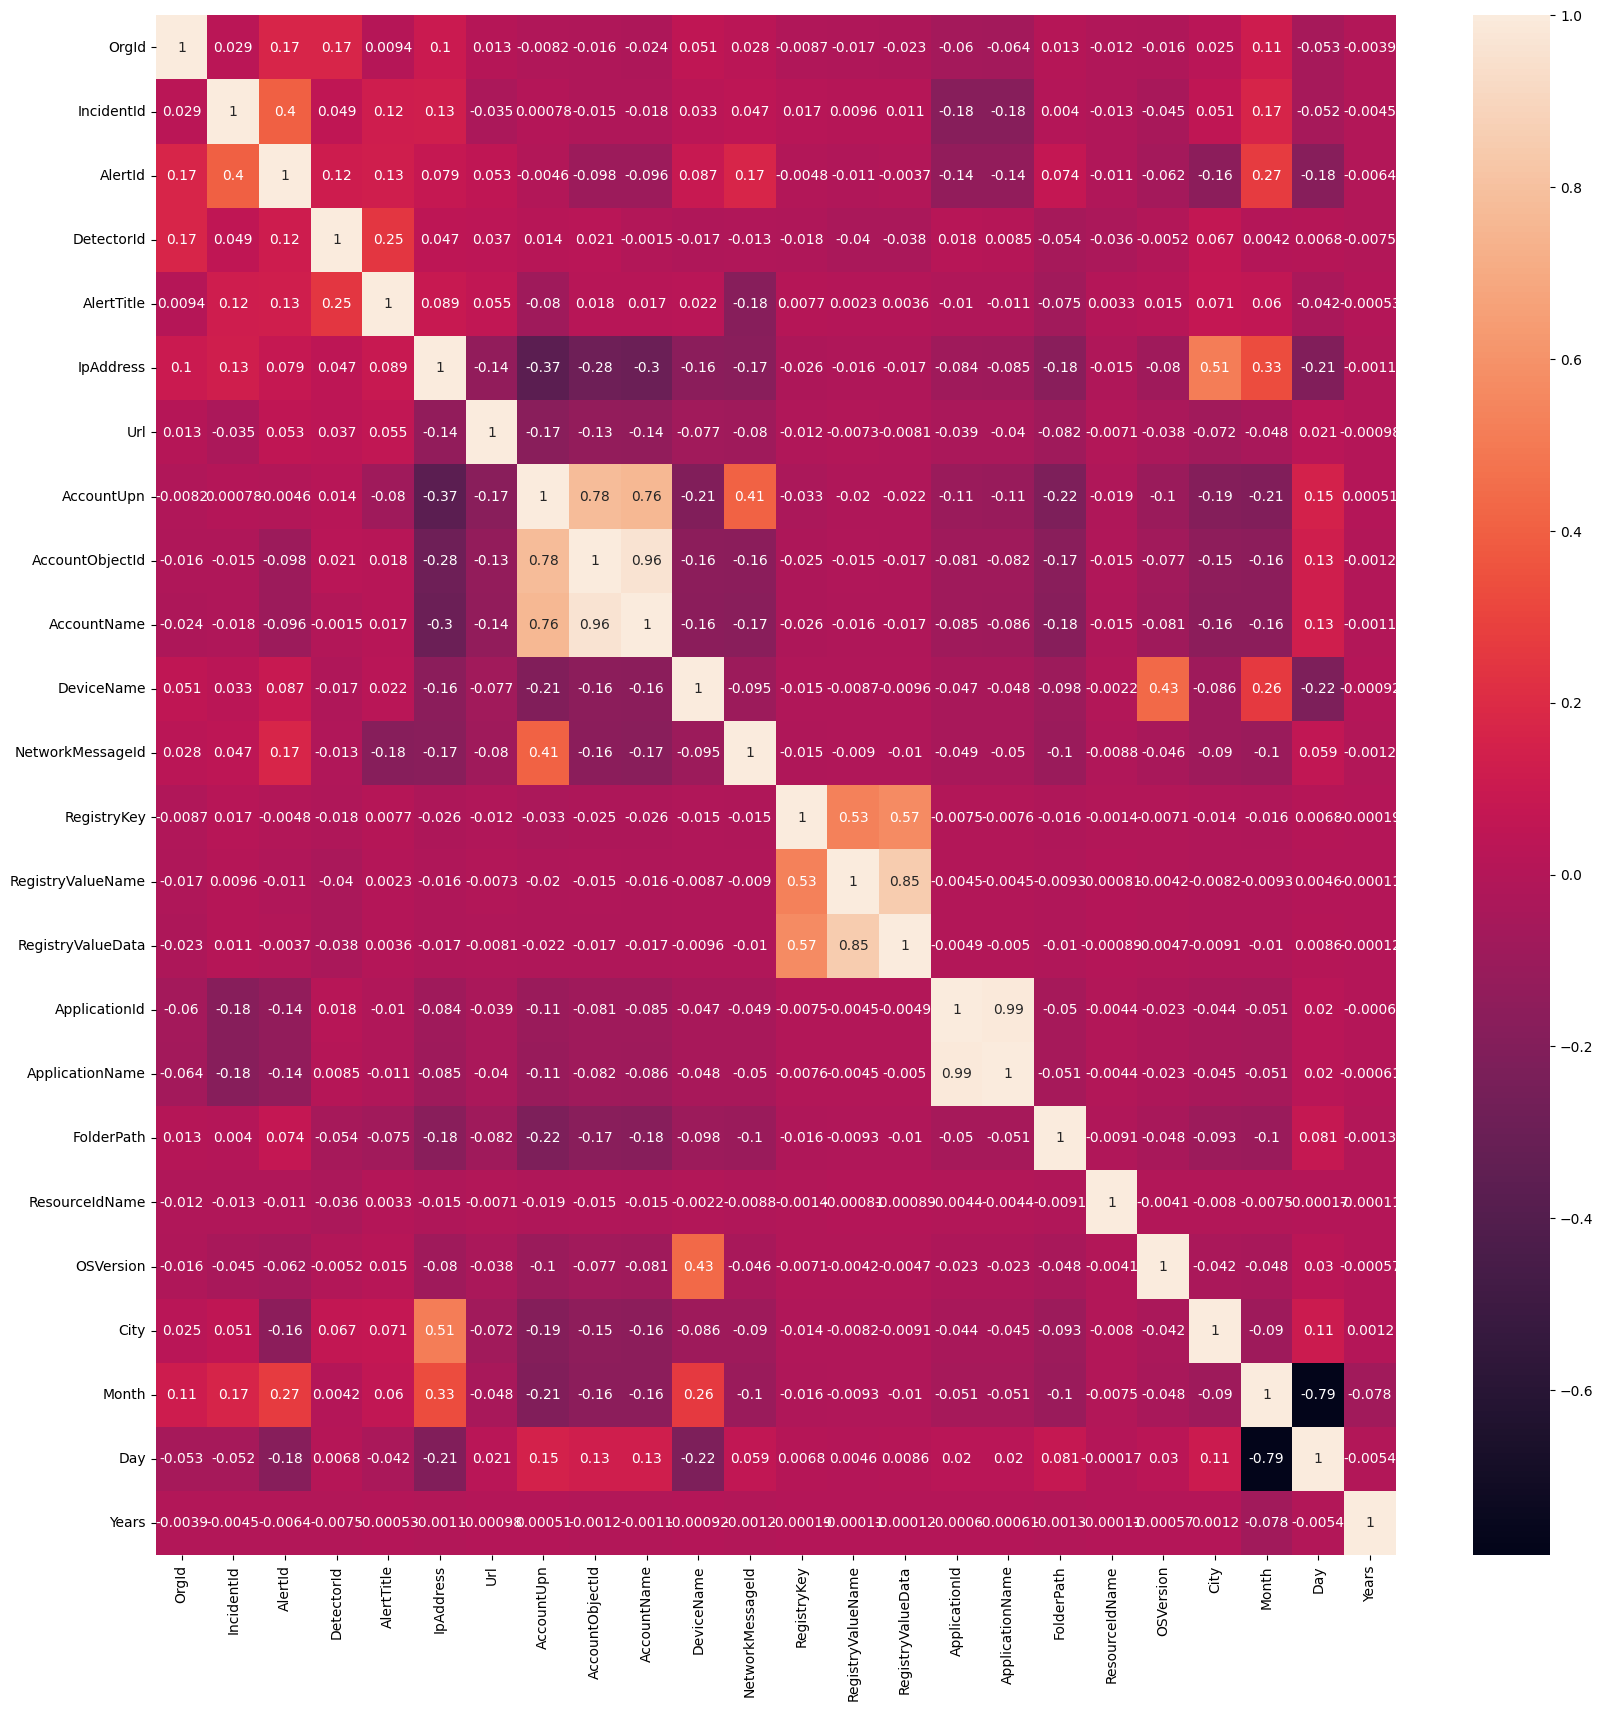

In [30]:
plt.figure(figsize=(20,20))
sns.heatmap(corr_matrix,annot=True)

In [31]:
data.columns

Index(['OrgId', 'IncidentId', 'AlertId', 'DetectorId', 'AlertTitle',
       'Category', 'IncidentGrade', 'EntityType', 'EvidenceRole', 'IpAddress',
       'Url', 'AccountUpn', 'AccountObjectId', 'AccountName', 'DeviceName',
       'NetworkMessageId', 'RegistryKey', 'RegistryValueName',
       'RegistryValueData', 'ApplicationId', 'ApplicationName', 'FolderPath',
       'ResourceIdName', 'OSVersion', 'City', 'Usage', 'Month', 'Day', 'Time',
       'Years'],
      dtype='object')

In [32]:
data.drop(columns=["AccountObjectId","DeviceName","NetworkMessageId"],inplace=True)

C:\Users\sandh\AppData\Local\Temp\ipykernel_33632\636376568.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns=["AccountObjectId","DeviceName","NetworkMessageId"],inplace=True)


In [33]:
data.drop(columns=["ApplicationName","FolderPath","ResourceIdName"],inplace=True)

C:\Users\sandh\AppData\Local\Temp\ipykernel_33632\3739821346.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns=["ApplicationName","FolderPath","ResourceIdName"],inplace=True)


In [34]:
data.drop(columns=["AccountUpn"],inplace=True)

C:\Users\sandh\AppData\Local\Temp\ipykernel_33632\1024315524.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns=["AccountUpn"],inplace=True)


In [35]:
data.drop(columns=["AccountName","RegistryKey","RegistryValueName"],inplace=True)

C:\Users\sandh\AppData\Local\Temp\ipykernel_33632\2140144047.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns=["AccountName","RegistryKey","RegistryValueName"],inplace=True)


In [36]:
data.drop(columns=["RegistryValueData"],inplace=True)

C:\Users\sandh\AppData\Local\Temp\ipykernel_33632\729714040.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns=["RegistryValueData"],inplace=True)


In [37]:
data.drop(columns=["OSVersion"],inplace=True)

C:\Users\sandh\AppData\Local\Temp\ipykernel_33632\984205797.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns=["OSVersion"],inplace=True)


In [38]:
filtered_data=data

In [39]:
filtered_data.head(3)

,OrgId,IncidentId,AlertId,DetectorId,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,IpAddress,Url,ApplicationId,City,Usage,Month,Day,Time,Years
0,657,11767,87199,524,563,LateralMovement,BenignPositive,User,Impacted,360606,160396,2251,10630,Private,6,4,22:56:27,2024
1,3,91158,632273,2,2,CommandAndControl,BenignPositive,Machine,Impacted,360606,160396,2251,10630,Public,6,3,12:58:26,2024
2,145,32247,131719,2932,10807,LateralMovement,BenignPositive,Process,Related,360606,160396,2251,10630,Public,6,8,03:20:49,2024


In [40]:
le=LabelEncoder()

In [41]:
categorical_col=filtered_data.select_dtypes(include=["object"])
for i in categorical_col:
    filtered_data[i]=le.fit_transform(categorical_col[i])

C:\Users\sandh\AppData\Local\Temp\ipykernel_33632\158988550.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data[i]=le.fit_transform(categorical_col[i])
C:\Users\sandh\AppData\Local\Temp\ipykernel_33632\158988550.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data[i]=le.fit_transform(categorical_col[i])
C:\Users\sandh\AppData\Local\Temp\ipykernel_33632\158988550.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_ind

In [42]:
categorical_col

,Category,IncidentGrade,EntityType,EvidenceRole,Usage,Time
0,LateralMovement,BenignPositive,User,Impacted,Private,22:56:27
1,CommandAndControl,BenignPositive,Machine,Impacted,Public,12:58:26
2,LateralMovement,BenignPositive,Process,Related,Public,03:20:49
3,InitialAccess,FalsePositive,CloudLogonSession,Related,Public,12:07:31
4,Discovery,BenignPositive,User,Impacted,Public,17:42:05
...,...,...,...,...,...,...
4147985,Malware,BenignPositive,Machine,Impacted,Public,20:24:41
4147987,InitialAccess,BenignPositive,User,Impacted,Public,03:53:15
4147988,InitialAccess,BenignPositive,User,Impacted,Private,19:32:19
4147989,CommandAndControl,FalsePositive,Ip,Related,Public,00:50:22


In [43]:
filtered_data.head(3)

,OrgId,IncidentId,AlertId,DetectorId,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,IpAddress,Url,ApplicationId,City,Usage,Month,Day,Time,Years
0,657,11767,87199,524,563,11,0,28,0,360606,160396,2251,10630,0,6,4,82520,2024
1,3,91158,632273,2,2,1,0,15,0,360606,160396,2251,10630,1,6,3,46649,2024
2,145,32247,131719,2932,10807,11,0,23,1,360606,160396,2251,10630,1,6,8,12037,2024


In [44]:
filtered_data.to_csv("filtered_TEST_datas.csv",index=False)

In [45]:
data1=pd.read_csv("filtered_TEST_datas.csv")

In [46]:
data1.head()

,OrgId,IncidentId,AlertId,DetectorId,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,IpAddress,Url,ApplicationId,City,Usage,Month,Day,Time,Years
0,657,11767,87199,524,563,11,0,28,0,360606,160396,2251,10630,0,6,4,82520,2024
1,3,91158,632273,2,2,1,0,15,0,360606,160396,2251,10630,1,6,3,46649,2024
2,145,32247,131719,2932,10807,11,0,23,1,360606,160396,2251,10630,1,6,8,12037,2024
3,222,15294,917686,0,0,10,1,7,1,360606,160396,2251,10630,1,6,12,43594,2024
4,363,7615,5944,27,18,5,0,28,0,360606,160396,2251,10630,1,6,6,63665,2024


In [47]:
import pandas as pd

# Convert int64 columns to int32
int_columns = data1.select_dtypes(include=['int64']).columns

data1[int_columns] = data1[int_columns].astype('int32')

# Verify the data types
print(data1.dtypes)


OrgId            int32
IncidentId       int32
AlertId          int32
DetectorId       int32
AlertTitle       int32
Category         int32
IncidentGrade    int32
EntityType       int32
EvidenceRole     int32
IpAddress        int32
Url              int32
ApplicationId    int32
City             int32
Usage            int32
Month            int32
Day              int32
Time             int32
Years            int32
dtype: object


In [48]:
data1.drop(columns=["Usage"],inplace=True)

HANDLING THE OVERSAMPLING

In [49]:
data1["IncidentGrade"].value_counts()


IncidentGrade
0    1630942
2    1422856
1     868897
Name: count, dtype: int64

In [50]:
# Separate features (X) and target (y)
X = data1.drop(columns=["IncidentGrade"])
y = data1["IncidentGrade"]
ros = RandomOverSampler(
    sampling_strategy='auto',
    random_state=0,
)  
X_resampled, y_resampled = ros.fit_resample(X, y)


In [51]:
y_resampled.value_counts()


IncidentGrade
0    1630942
1    1630942
2    1630942
Name: count, dtype: int64

In [52]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X_resampled,y_resampled, test_size = 0.20, random_state = 43)


In [53]:
print(f"x_train:{x_train.shape}")
print(f"x_test:{x_test.shape}")
print(f"y_train:{y_train.shape}")
print(f"y_test:{y_test.shape}")


x_train:(3914260, 16)
x_test:(978566, 16)
y_train:(3914260,)
y_test:(978566,)


In [54]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [55]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Define the DecisionTreeClassifier model
dt_model = DecisionTreeClassifier(random_state=42)

# Correct the parameter grid syntax
dt_param_grid = {
    'max_depth': [10],  # You can add more values if needed for tuning
    'min_samples_split': [10],
    'min_samples_leaf': [5],
    'random_state': [100]
}

# Initialize GridSearchCV with cross-validation, multiple jobs for parallelization
dt_grid = GridSearchCV(estimator=dt_model, param_grid=dt_param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the model on training data
dt_grid.fit(x_train, y_train)


Fitting 3 folds for each of 1 candidates, totalling 3 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10], 'min_samples_leaf': [5],
                         'min_samples_split': [10], 'random_state': [100]},
             verbose=2)

In [56]:
dt_grid.best_score_

0.7722044523997972

In [57]:
y_pred_dt = dt_grid.predict(x_test)

In [58]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.62      0.92      0.74    326185
           1       0.89      0.65      0.75    326115
           2       0.96      0.75      0.84    326266

    accuracy                           0.77    978566
   macro avg       0.82      0.77      0.78    978566
weighted avg       0.82      0.77      0.78    978566



In [59]:
# 2. Random Forest Regressor - GridSearchCV and Model Fit/Predict
rf_model = RandomForestClassifier(random_state=42)
rf_param_grid = {
    'n_estimators':[50],
    'max_depth':[10],
    'min_samples_split': [5],
    'min_samples_leaf':  [2]
}
rf_grid_search = GridSearchCV(estimator=rf_model, param_grid=rf_param_grid, cv=3, n_jobs=-1, verbose=2)
rf_grid_search.fit(x_train, y_train)


Fitting 3 folds for each of 1 candidates, totalling 3 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10], 'min_samples_leaf': [2],
                         'min_samples_split': [5], 'n_estimators': [50]},
             verbose=2)

In [60]:
rf_grid_search.best_score_

0.8142622111469927

In [61]:
y_pred_rf = rf_grid_search.predict(x_test)

In [62]:
print(classification_report(y_test,y_pred_rf)) 

              precision    recall  f1-score   support

           0       0.68      0.95      0.79    326185
           1       0.91      0.73      0.81    326115
           2       0.98      0.78      0.87    326266

    accuracy                           0.82    978566
   macro avg       0.85      0.82      0.82    978566
weighted avg       0.85      0.82      0.82    978566



In [63]:
import xgboost


In [64]:
import xgboost as xgb

xgbmodel = xgboost.XGBClassifier(n_estimators=200,learning_rate=0.1,random_state=100,n_jobs=-1,max_depth=8)


# Fit the model
xgbmodel.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=-1,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [65]:
y_pred_x = xgbmodel.predict(x_test)

In [66]:
print(classification_report(y_test,y_pred_x)) 

              precision    recall  f1-score   support

           0       0.94      0.94      0.94    326185
           1       0.93      0.95      0.94    326115
           2       0.97      0.94      0.95    326266

    accuracy                           0.94    978566
   macro avg       0.95      0.94      0.94    978566
weighted avg       0.95      0.94      0.94    978566

